## Import module

In [2]:
import os
import sys
import math
import time
import itertools
from collections import defaultdict
import numpy as np
import pandas as pd
import glob
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import  MonthLocator
from matplotlib.colors import LogNorm, Normalize
import matplotlib.colors as colors
import seaborn as sns
from scipy.stats import pearsonr
from pycirclize import Circos

ModuleNotFoundError: No module named 'pycirclize'

## Standard Plot

In [3]:
def StandardPlot(ax, fontsize=12, grid=True, ticks=True, left=True, right=True, top=True, bottom=True):
    font_label = {'family': 'arial', 'size': fontsize}
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname('arial') for label in labels]
    if grid == True:
        ax.xaxis.grid(linestyle='--', c='grey',
                      alpha=0.4, linewidth=0.5, zorder=0)
        ax.yaxis.grid(linestyle='--', c='grey',
                      alpha=0.4, linewidth=0.5, zorder=0)
    if ticks == True:
        ax.tick_params(axis='x', direction='out',
                       color='k', labelsize=fontsize, pad=3)
        ax.tick_params(axis='y', direction='out',
                       color='k', labelsize=fontsize, pad=3)
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(right)
    ax.spines['top'].set_visible(top)
    ax.spines['bottom'].set_visible(bottom)
    return ax

# Define link_kws handler function to customize each link property
def link_kws_handler(from_label: str, to_label: str):
    if from_label in ("South Korea", "USA",'Japan','Australia','Singapore'):
        # Set alpha, zorder values higher than other links for highlighting
        return dict(alpha=0.5, zorder=1.0)
    else:
        return dict(alpha=0.2, zorder=0)

## International travel volumn into the Chinese mainland

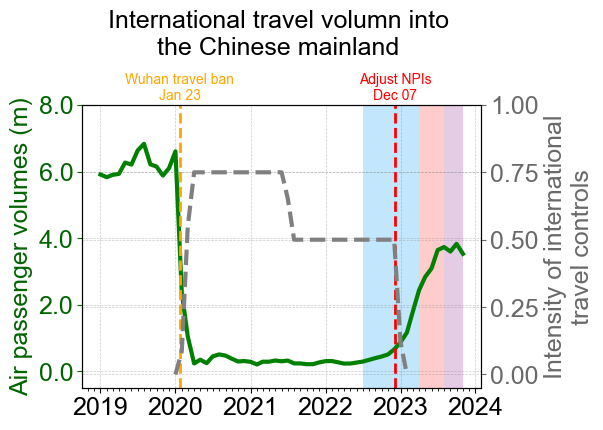

In [4]:
df_travel = pd.read_csv('International_air_travle_volumn.csv')
date_lst = [datetime.datetime.strptime(x, '%Y-%m') for x in df_travel['Date']]
value_lst = [i/1000000 for i in df_travel['Total Est. Pax']]
df_policy = pd.read_csv('../data/international_travel_policy.csv')
df_policy['Date_mon'] = ['%s-%s' % (i.split('-')[0],i.split('-')[1]) for i in df_policy['Date']]
df_policy = df_policy.groupby('Date_mon')['C8'].mean().reset_index()
policy_date_lst = [datetime.datetime.strptime('%s-%s' % (i.split('-')[0],i.split('-')[1]), '%Y-%m') for i in df_policy['Date_mon']]
fontsize=18
plt.rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots(1,1,figsize = (6,4.5))
# ax_array = ax.flatten()
ax.plot(date_lst,value_lst,color = 'green',linewidth = 3)
ax.set_ylim([-0.5,8])
ax_policy = ax.twinx() 
ax_policy.plot(policy_date_lst,df_policy['C8'],color = 'grey',linewidth = 3,linestyle ='--')
ax_policy.set_ylim([-0.05,1])
t1 = datetime.datetime.strptime('2020-02-01', '%Y-%m-%d')
t2 = datetime.datetime.strptime('2022-07-01', '%Y-%m-%d')
t3 = datetime.datetime.strptime('2023-11', '%Y-%m')
t4 = datetime.datetime.strptime('2022-07-01', '%Y-%m-%d')
t5 = datetime.datetime.strptime('2023-04-01', '%Y-%m-%d')
t6 = datetime.datetime.strptime('2023-08-01', '%Y-%m-%d')
t7 = datetime.datetime.strptime('2023-11-01', '%Y-%m-%d')
t_policy_1 = datetime.datetime.strptime('2020-01-23', '%Y-%m-%d')
t_lift = datetime.datetime.strptime('2022-12-07', '%Y-%m-%d')
ax.axvspan(t4, t5, facecolor='#87CEFA',alpha = 0.5,zorder = 0)
ax.axvspan(t5, t6, facecolor='red',alpha = 0.2,zorder =0)
ax.axvspan(t6, t7, facecolor='purple',alpha = 0.2,zorder = 0)
ax.axvline(x=t_lift,linewidth = 2,color = 'red',linestyle='--',alpha = 1)
ax.axvline(x=t_policy_1,linewidth = 2,color = 'orange',linestyle='--',alpha = 1)
ax = StandardPlot(ax,fontsize = fontsize)
ax_policy = StandardPlot(ax_policy,fontsize = fontsize)
monthlocator = MonthLocator()
ax.xaxis.set_minor_locator(monthlocator)
ax.set_yticks([0,2,4,6,8],['0.0','2.0','4.0','6.0','8.0'])
font_label = {'family': 'Arial', 'size': fontsize}
ax.set_ylabel('Air passenger volumes (m)',{'family': 'arial', 'size': fontsize,'color':'#006400'})
ax_policy.set_ylabel('Intensity of international\ntravel controls',{'family': 'arial', 'size': fontsize,'color':'#696969'})
ax.tick_params(axis='y', direction='out',color='#006400', labelsize=fontsize, pad=3)
ax_policy.tick_params(axis='y', direction='out',color='#696969', labelsize=fontsize, pad=3)
[label.set_color('#006400') for label in ax.get_yticklabels()]
[label.set_color('#696969') for label in ax_policy.get_yticklabels()]
ax.text(t_policy_1,8.15,'Wuhan travel ban\nJan 23',fontsize = 10,color = 'orange',horizontalalignment='center',fontweight='500',fontfamily = 'arial')
ax.text(t_lift,8.15,'Adjust NPIs\nDec 07',fontsize = 10,color = 'red',horizontalalignment='center',fontweight='500',fontfamily = 'arial')
ax.set_title('International travel volumn into \nthe Chinese mainland ',{'family': 'arial', 'size': fontsize},y= 1.15)
plt.tight_layout()

## Circos plot illustrating overseas air passenger inflows to Chinese provinces

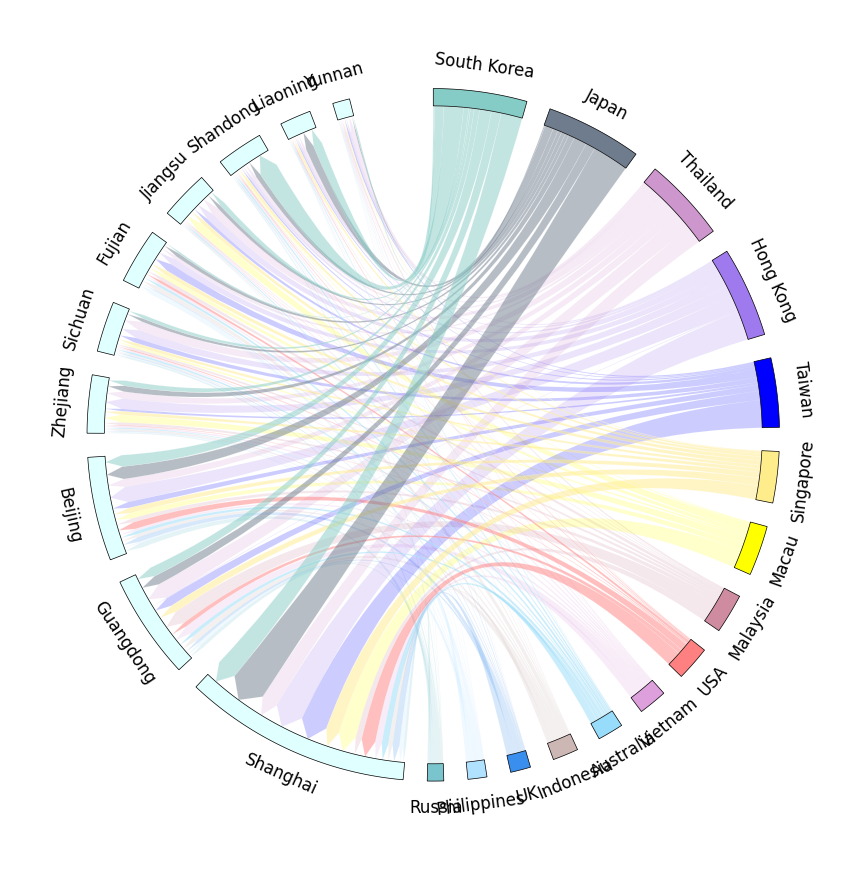

In [6]:
color_dct = {
        'Hong Kong':'#9F79EE',
        'Taiwan':'blue',
        'Macau':'yellow',
        'Japan':'#6E7C8D',
        'South Korea':'#86CCC6',
        'USA':'#FF8080',
        'Canada':'#FFE1FF',
        'France':'#78AEDE',
        'Singapore':'#FFEC8B',
        'Australia':'#97DCFA',
        'Germany':'#84C887',
        'Israel':'#708090',
        'UK':'#3A8EED',
        'Ireland':'#CDC9C9',
        'South Africa':'#938964',
        'Italy':'#A1D99B',
        'Austria':'#BC9281',
        'Luxembourg':'#BF5AF2',
        'Denmark':'#F9E0CE',
        'Malaysia':'#CF8CA1',
        'New Zealand':'#00FFFF',
        'India':'#D7E27F',
        'Indonesia':'#CDB7B5',
        'Netherlands':'#D1EEEE',
        'Thailand':'#CD96CD',
        'Vietnam':'#DDA0DD',
        'Philippines':'#B0E2FF',
        'Russia':'#7AC5CD',
        'Cambodia':'#BCD2EE',
        'United Arab Emirates':'#938964',
        'Others':'#E0FFFF',}
plt.rcParams['pdf.fonttype'] = 42
df_flight = pd.read_csv('Overseas_flight_to_province_top15.csv',index_col = 0)
plot_color = {i:color_dct[i] for i in df_flight.index}
for i in df_flight.columns:
    plot_color[i] = color_dct['Others']
circos = Circos.initialize_from_matrix(
    df_flight,
    start = 0,end = 350,
    r_lim=(95,100),
    space=4,
    endspace=True,
    cmap =plot_color, 
    label_kws=dict(size=12,r=105,adjust_rotation=90),
    link_kws=dict(direction=1, ec="white", lw=0.2),
    link_kws_handler=link_kws_handler)
fig = circos.plotfig()
fig.tight_layout()

## Heatmap of monthly overseas air passenger inflows from major source regions and the monthly number of imported SARS-CoV-2 viral strains

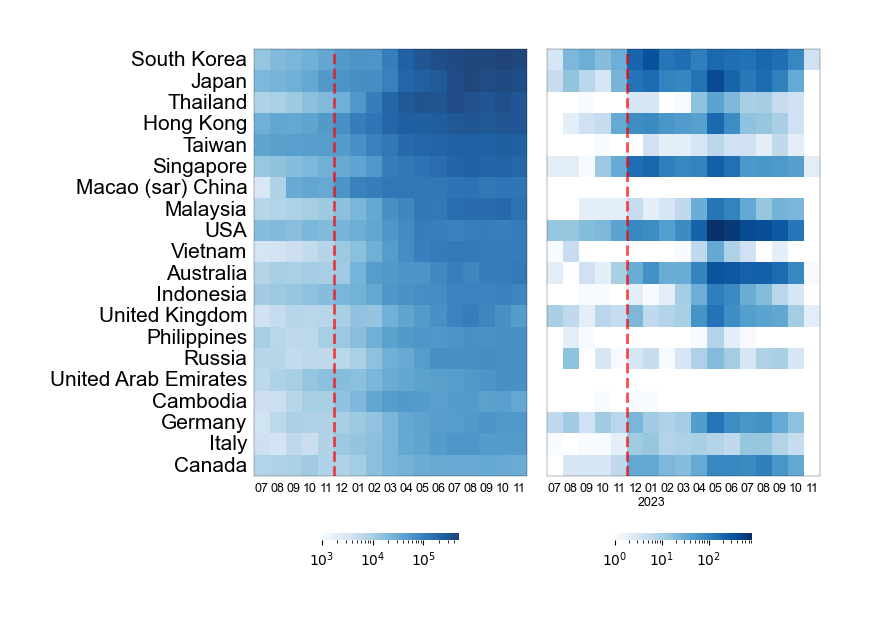

In [7]:
def overseas_flight_fig(ax,df_mat):
    t_lst = df_mat.columns.tolist()
    vmin = 1000
    vmax = max(df_mat.max())
    log_norm = LogNorm(vmin=vmin, vmax=vmax,clip=True)
    cmap = colors.ListedColormap(['white', 'white', 'blue'])
    x_tick_lst = [datetime.datetime.strptime(str(i), "%Y%m").strftime('%m\n%Y') if i in [202205,202301]  else datetime.datetime.strptime(str(i), "%Y%m").strftime('%m') for i in t_lst ]
    p1 = sns.heatmap(data=df_mat,ax = ax,
                cmap = 'Blues',linecolor='white',linewidths=0,square=False,
                cbar=True,cbar_kws={"shrink": 0.5,'pad':0.1,'alpha':0.9,'orientation':'horizontal'},
                 # vmin = vmin,vmax = vmax,    
                norm=log_norm,
                alpha = 0.9,
                xticklabels = x_tick_lst
                ) 
    return ax
dominant_Omicron_sublineages = ['BA.5','BF.7','DY','XBB','EG.5', 'HK']
color_dct = {
        'Hong Kong':'#9F79EE',
        'Taiwan':'blue',
        'Macau':'yellow',
        'Japan':'#6E7C8D',
        'South Korea':'#86CCC6',
        'USA':'#FF8080',
        'Canada':'#FFE1FF',
        'France':'#78AEDE',
        'Singapore':'#FFEC8B',
        'Australia':'#97DCFA',
        'Germany':'#84C887',
        'Israel':'#708090',
        'United Kingdom':'#3A8EED',
        'Ireland':'#CDC9C9',
        'South Africa':'#938964',
        'Italy':'#A1D99B',
        'Austria':'#BC9281',
        'Luxembourg':'#BF5AF2',
        'Denmark':'#F9E0CE',
        'Malaysia':'#CF8CA1',
        'New Zealand':'#00FFFF',
        'India':'#D7E27F',
        'Indonesia':'#CDB7B5',
        'Netherlands':'#D1EEEE',
        'Thailand':'#CD96CD',
        'Vietnam':'#DDA0DD',
        'Philippines':'#B0E2FF',
        'Russia':'#7AC5CD',
        'Cambodia':'#BCD2EE',
        'United Arab Emirates':'#938964',
        'Others':'grey',
        'domestic':'lightgrey'}
date_range = (202207,202311)
df_mat_flight = pd.read_csv('Overseas_flight_to_CN_top20.csv',index_col=0)
top20_region = df_mat_flight.index.tolist()
df_net_lst = []
export_dct = defaultdict(dict)
for lineage in dominant_Omicron_sublineages:
    df_net = pd.read_csv('../results/mutnet/Overseas_%s_network.csv' % lineage)
    df_net_lst.append(df_net)
df = pd.concat(df_net_lst)
df['t_year_month'] = ['%s-%s' % (i.split('-')[0],i.split('-')[1]) for i in df['t_date']]
df = df[(df['t_year_month'] >='2022-07') & (df['t_year_month']<='2023-11')]
invasion_dct = defaultdict(dict)
t_lst = sorted(df['t_year_month'].unique())
for x,y in df['source'].groupby([df['t_year_month'],df['s_country']]):
    invasion_dct[x[0]].update({x[1]:len(y)})
df_mat = pd.DataFrame(invasion_dct).reindex(top20_region)
fig, ax = plt.subplots(1,2,figsize=(8, 6),sharey = 'all')
plt.rcParams['pdf.fonttype'] = 42
fontsize=18
ax_array = ax.flatten()
ax2,ax1 = ax_array[0],ax_array[1]
x_tick_lst = [datetime.datetime.strptime(i, "%Y-%m").strftime('%m\n%Y') if i in ['2022-05','2023-01']  else datetime.datetime.strptime(i, "%Y-%m").strftime('%m') for i in t_lst ]
vmin=1
vmax=max(df_mat.max())
log_norm=LogNorm(vmin = vmin,vmax= vmax)
p1 = sns.heatmap(data=df_mat,ax = ax1,
            cmap = 'Blues',linecolor='black',linewidths=0,square=False,
            cbar=True,cbar_kws={"shrink": 0.5,'pad':0.1,'alpha':0.9,'orientation':'horizontal'},
            norm=log_norm,
            xticklabels = x_tick_lst
            ) 
ax2= overseas_flight_fig(ax2,df_mat_flight)
for axi in ax_array:
    axi.axvline(x=x_tick_lst.index('12'),linewidth = 2,color = 'red',linestyle='--',alpha = 0.7) 
    axi = StandardPlot(axi,grid = False)
    axi.tick_params(axis='y', direction='out',color='white', labelsize=fontsize/1.2, pad=1)
    axi.tick_params(axis='x', direction='out',color='white', labelsize=fontsize/2, pad=1,rotation = 0)
    for pos in ['top','bottom','left','right']:
        axi.spines[pos].set_linewidth(0.2)
plt.tight_layout()

## GLM results for six Omicron sublineages

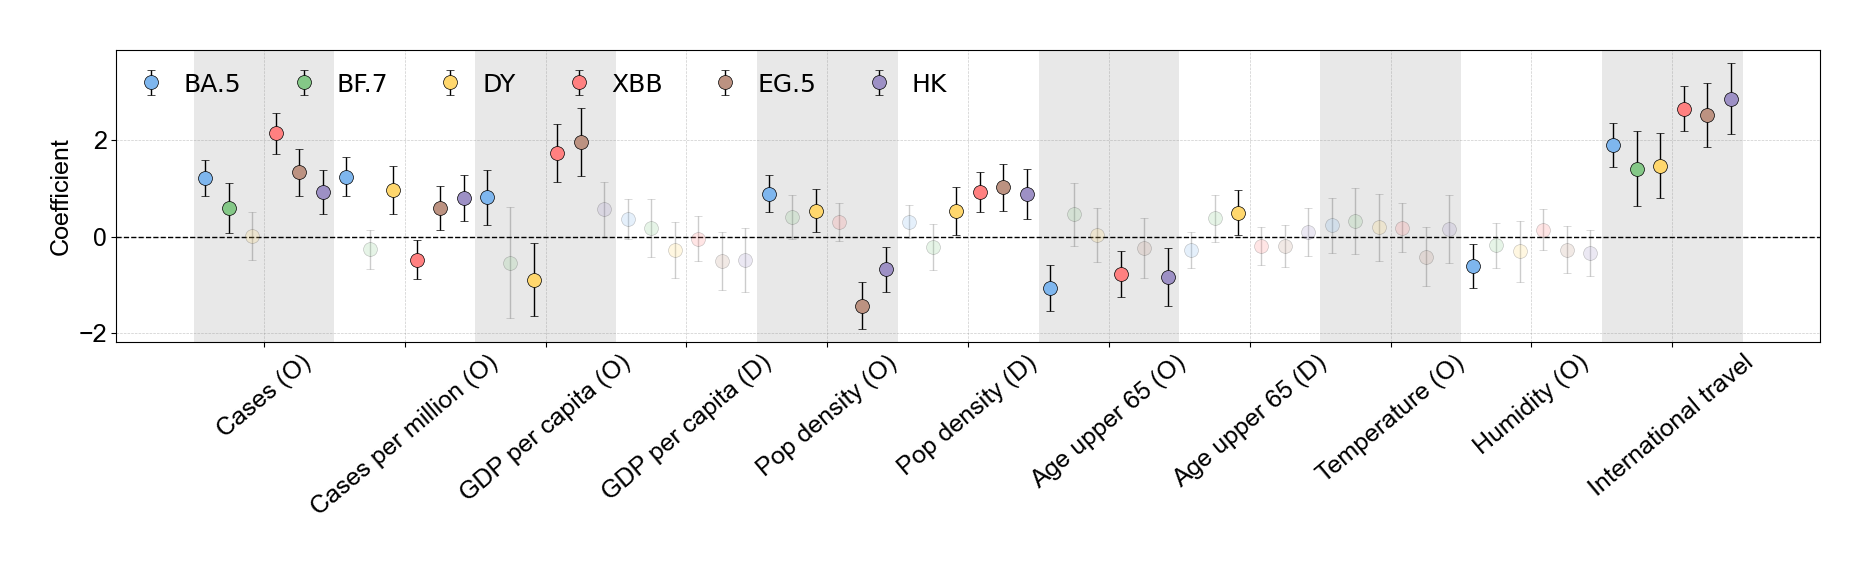

In [9]:
dominant_Omicron_sublineages = ['BA.5', 'BF.7','DY','XBB','EG.5','HK']
color_dct = {
            'BA.5':'#7EB6EE',
            'BF.7':'#84C887',
            'DY':'#FFD76D',
            'XBB':'#FF8080',
            'EG.5':'#BC9281',
            'HK':'#9D90C5'}
files = glob.glob(r'../results/glm/overseas_imports/model_result_*.csv')
df_lst = []
for file in files:
    dfi = pd.read_csv(file,index_col=0)
    dfi = dfi.reset_index(drop=False,names= ['factor']).query('factor!="const"')
    dfi['lineage'] = file.split('/')[-1].split('.csv')[0].split('_')[-1]
    df_lst.append(dfi)
df = pd.concat(df_lst)
x1 = np.arange(1,66,6)
x2 = x1+1
x3 = x1+2
x4 = x1+3
x5 = x1+4
x6 = x1+5
x_ticks = x1+2.5
X_lst = [x1,x2,x3,x4,x5,x6]
x_ticks_label = ['Cases (O)','Cases per million (O)','GDP per capita (O)','GDP per capita (D)','Pop density (O)','Pop density (D)','Age upper 65 (O)',
                'Age upper 65 (D)','Temperature (O)','Humidity (O)','International travel']
Y_lst,Y_err_lst,P_value_lst = [],[],[]
for lineage,xi in zip(dominant_Omicron_sublineages,X_lst):
    df_lin = df.query('lineage==@lineage')
    y = df_lin['Coef.']
    y_err= df_lin['Std.Err.']*1.96
    p_value = df_lin['P>|z|']
    Y_lst.append(y)
    Y_err_lst.append(y_err)
    P_value_lst.append(p_value)
fontsize = 18
plt.rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots(1,1, figsize=(18,5))
p_lst= []
for xi,yi,y_err_i,p_value_i,lineage in zip(X_lst,Y_lst,Y_err_lst,P_value_lst,dominant_Omicron_sublineages):
    for xii,yii,y_err_ii,p in zip(xi,yi,y_err_i,p_value_i):
        if p<=0.05:
            ax.errorbar(xii,yii, y_err_ii, 
                        fmt='o',mec='k',mew = 0.5,ms=10,c = color_dct[lineage],
                        capthick=0.5, capsize=3,ecolor='k',elinewidth=1,alpha = 1,label = lineage)
        else:
            ax.errorbar(xii,yii, y_err_ii, 
                        fmt='o',mec='k',mew = 0.5,ms=10,c = color_dct[lineage],
                        capthick=0.5, capsize=3,ecolor='k',elinewidth=1,alpha = 0.2)            
for i in range(0,len(x_ticks),2):
    ax.axvspan(x_ticks[i]-3, x_ticks[i]+3, facecolor='lightgrey',alpha = 0.5)
ax = StandardPlot(ax,fontsize=fontsize)
ax.axhline(y=0,linewidth = 1,color = 'k',linestyle='--') 
ax.set_ylabel('Coefficient',{'family': 'arial', 'size': fontsize})
ax.set_xticks(x_ticks,x_ticks_label)
ax.tick_params(axis='x', direction='out',color='black', labelsize=fontsize, pad=3,rotation = 40)
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[labels.index(i)] for i in dominant_Omicron_sublineages],dominant_Omicron_sublineages,
          ncols = 6,
          loc='upper left',fontsize = fontsize,frameon= False)
plt.tight_layout()
